# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Loading the data

In [2]:
# Load the MNIST dataset and preprocess it
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0
Y_train = Y_train.astype('int32')
Y_test = Y_test.astype('int32')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Split the dataset (X_train & Y_train) into training and validation sets
X_val = X_train[:6000, :]# Validation Split (should be 10% of X_train)
Y_val = Y_train[:6000]# Validation Split for labels
X_train = X_train[6000:, :]# Training Split (remaining 90% of X_train)
Y_train = Y_train[6000:]# Training Split for labels

Display a random sample from the dataset

In [4]:
Y_test.shape

(10000,)

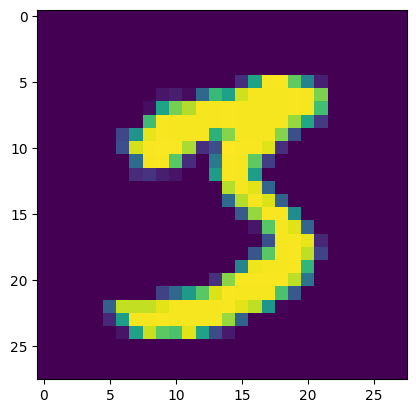

In [ ]:
# Visualize a sample from X_train (Keep in mind the images are stored as 1x784 and need to be converted to 28x28 in order to display) using a matplotlib heatmap
dataSample = X_train[np.random.randint(54000), :].reshape(28, 28)
plt.imshow(dataSample)
plt.show()

# MODEL

In [ ]:
# We'll be making a model with 2 hidden layers with sigmoid activations

i = 784 # Input size (no. of pixels = 28*28 = 784)
h1 = 196 # Choose a reasonable no. of nodes for 1st hidden layer
h2 = 49 # Choose a reasonable no. of nodes for 2nd hidden layer
o = 10 # Output size (no. of digits to classify)
lr = 0.15 # Choose a reasonable learning rate
epochs = 20 # Choose a reasonable no. of epochs

# Initialize the weights and biases (Generally, we follow the convention that weights are drawn from a standard normal distribution, while the bias vectors are initialized to zero.)

# Initialize W1 W2 W3
W1 = np.random.normal(0, 0.1, size = (h1, i))
W2 = np.random.normal(0, 0.1, size = (h2, h1))
W3 = np.random.normal(0, 0.1, size = (o, h2))

# Initialize b1 b2 b3
b1 = np.zeros((h1, 1))
b2 = np.zeros((h2, 1))
b3 = np.zeros((o, 1))

# Defining Activation Functions

def sigmoid(z) :
    return 1/(1 + np.exp(-z))

def sigmoidprime(z) :
    return ((sigmoid(z))**2)*(np.exp(-z))
    # Returns derivative of sigmoid function of z

def one_hot(y,bs) :
    # One-hot encoding is a method used in machine learning to represent categorical data, such as different classes or categories, as binary vectors.
    # In this encoding, each category is assigned a unique binary value, where only one bit is set to 1 (hot), and the rest are set to 0.
    # This creates a binary vector with a length equal to the number of categories, and it helps machine learning algorithms better understand and process categorical information.

    # Let's consider a simple example with three categories: "Red," "Blue," and "Green." In one-hot encoding:
    # "Red" might be represented as [1, 0, 0]
    # "Blue" might be represented as [0, 1, 0]
    # "Green" might be represented as [0, 0, 1]

    # Fill in this function to return the one hot encoded values for digits 0 to 9
    onehot = np.zeros((bs, 1))
    onehot[y, 0] = 1
    return onehot

# Before we start with the training loop. Lets create 2 empty lists to store the cost and accuracy values at the end of each epoch
cost = []
accuracy = []

# Training Loop
for ep in range(epochs):
    c_temp = 0
    print(f"Epoch {ep+1}")
    print("")
    print(("Training:" + " "*44 + "|"))
    for i in range(len(X_train)):

        # Forward Propagation
        # Carry out the forward propagation matrices calculations for z1, a1, z2, a2, z3 and y_predicted

        inp = X_train[i].reshape(784, 1)
        z1 = np.matmul(W1, inp) + b1
        a1 = sigmoid(z1)
        z2 = np.matmul(W2, a1) + b2
        a2 = sigmoid(z2)
        z3 = np.matmul(W3, a2) + b3
        y_predicted = sigmoid(z3)

        # Convert the label of current iteration (Y_train[i]) to one hot encoded vector
        y_actual = one_hot(Y_train[i], o)

        # Calulate the cost as per your choice of loss function
        # Using sum of squares of differences
        
        c_temp = y_predicted - y_actual
        c_temp = np.square(c_temp)
        c_temp = np.sum(c_temp)/20

        # You can append this loss function value to the cost values list at every 200 iterations or so
        if (i%1000 == 999):
          print("|", end="")
          # print(a1.transpose())
          # print(a2.transpose())
          # print(y_actual.transpose())
          # print(z3.transpose())

        # Carry out the back propagation matrices calculations
        # del_lk == del_Bk
        del_l3 = np.multiply((y_predicted - y_actual), sigmoidprime(z3))
        del_l2 = np.multiply(np.matmul(W3.transpose(), del_l3), sigmoidprime(z2))
        del_l1 = np.multiply(np.matmul(W2.transpose(), del_l2), sigmoidprime(z1))

        del_W3 = np.matmul(del_l3, a2.transpose())
        del_W2 = np.matmul(del_l2, a1.transpose())
        del_W1 = np.matmul(del_l1, inp.transpose())

        # Update the values of W1 W2 W3 b1 b2 b3 as per the backpropagation values
        W3 = W3 - del_W3*lr
        W2 = W2 - del_W2*lr
        W1 = W1 - del_W1*lr
        b3 = b3 - del_l3*lr
        b2 = b2 - del_l2*lr
        b1 = b1 - del_l1*lr

        # End of loop (i)

    # Carry out forward propagation for the validation set
    val = np.full((len(X_val), ), -1)
    print("\nValidating...")
    for i in range(len(X_val)):

        # Define cutoff
        cutoff = 0.99
        # Forward Propagation
        # Carry out the forward propagation matrices calculations for z1, a1, z2, a2, z3 and y_predicted

        inp = X_val[i].reshape(784, 1)
        z1 = np.matmul(W1, inp) + b1
        a1 = sigmoid(z1)
        z2 = np.matmul(W2, a1) + b2
        a2 = sigmoid(z2)
        z3 = np.matmul(W3, a2) + b3
        y_predicted = sigmoid(z3)

        # Get the value
        if(np.max(y_predicted) >= cutoff):
          val[i] = np.argmax(y_predicted)

        # End of loop (i)

    # Find the accuracy by comparing the model output on validation set with validation set labels
    acc_ep = ((np.sum(val == Y_val))/(len(Y_val)))*100
    # You can print this accuracy to see your model's performance at the end of each epoch
    print(f"Accuracy in epoch {ep} (Cutoff {cutoff*100}%): {acc_ep}%")
    # Append the accuracy values to the accuracy list
    accuracy.append(acc_ep)
    # Reflect change in weights & biases
    # print(f"W1: {np.sum(del_W1)}, W2: {np.sum(del_W2)}")
    # print(f"W3: {np.sum(del_W3)}, b1: {np.sum(del_l1)}")
    # print(f"b2: {np.sum(del_l2)}, b3: {np.sum(del_l3)}")
    print(f"Average cost: {c_temp}")

    print("-"*50)
    print("")

Epoch 1

Training:                                            |
||||||||||||||||||||||||||||||||||||||||||||||||||||||
Validating...
Accuracy in epoch 0 (Cutoff 99.0%): 37.11666666666667%
Average cost: 0.0030406960362669533
--------------------------------------------------

Epoch 2

Training:                                            |
||||||||||||||||||||||||||||||||||||||||||||||||||||||
Validating...
Accuracy in epoch 1 (Cutoff 99.0%): 54.28333333333333%
Average cost: 0.001291525118545143
--------------------------------------------------

Epoch 3

Training:                                            |
||||||||||||||||||||||||||||||||||||||||||||||||||||||
Validating...
Accuracy in epoch 2 (Cutoff 99.0%): 62.55%
Average cost: 0.0007121298534942011
--------------------------------------------------

Epoch 4

Training:                                            |
||||||||||||||||||||||||||||||||||||||||||||||||||||||
Validating...
Accuracy in epoch 3 (Cutoff 99.0%): 71.2%
Average co

# Testing the model

In [ ]:
def classify(image):
    # Fill in this function to carry out forward propagation on input 'image' and return the predicted values of the trained model
    inp = image.reshape(784, 1)
    z1 = np.matmul(W1, inp) + b1
    a1 = sigmoid(z1)
    z2 = np.matmul(W2, a1) + b2
    a2 = sigmoid(z2)
    z3 = np.matmul(W3, a2) + b3
    y_predicted = sigmoid(z3)
    return y_predicted.reshape((10, ))

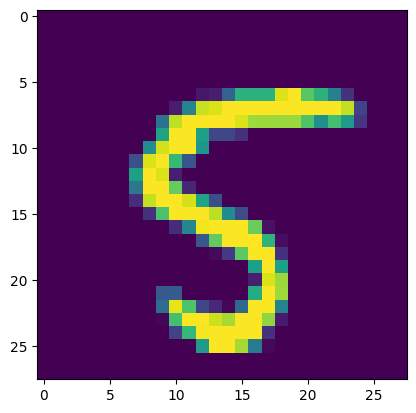

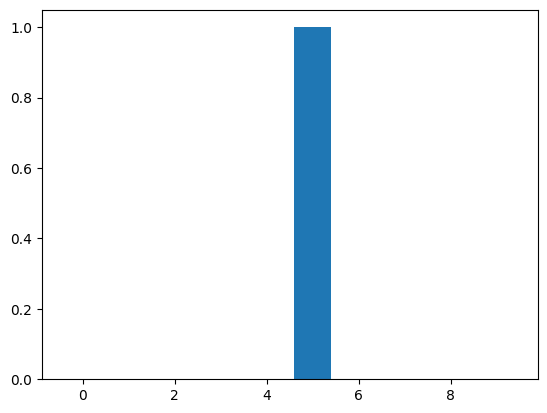

Predicted output is 5 with probability 99.99786824604648%
Actual output is 5


In [ ]:
# Display an image from the X_test set
test = np.random.randint(10000)
img = X_test[test, :].reshape(28, 28)
plt.imshow(img)
plt.show()
# Display the model's output for this image utilizing the classify function
out = classify(img)
plt.bar(np.linspace(0, 9, num = 10), out)
plt.show()
# You can use np.argmax function to determine the most likely predicted digit according to the model.
print(f"Predicted output is {np.argmax(out)} with probability {np.max(out)*100}%")
print(f"Actual output is {Y_test[test]}")

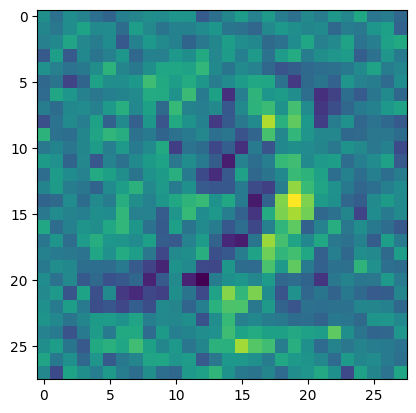

In [ ]:
#Weight matrix visualisation for layer 1
neuron = 1
weight_dist = W1[neuron-1, :].reshape(28, 28)
plt.imshow(weight_dist)
plt.show()

###If you're getting a good accuracy on your model (>85%) export the weights and bias matrices as numpy files, we'll need these later for custom dataset tests

In [ ]:
# Use np.save function to export the numpy arrays
with open('test.npy', 'wb') as f:
    np.save(f, W1)
    np.save(f, W2)
    np.save(f, W3)
    np.save(f, b1)
    np.save(f, b2)
    np.save(f, b3)